In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"
strong_purple = "#9E5BD5"
middle_blue = "#61BDF7"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#4569BB"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
# Import Trajectory Data
data_folder = r"E:\data\gst-0710-23\N9\Baseline\Trakectory"

search_iteration = 50
N = 9
K_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
G_trajectory_list, S_trajectory_list = [], []
G_layer_info_list, S_layer_info_list = [], []
for K in K_list:
    with open(data_folder + r"\G_nodes_relation_int_K_{0}".format(K), "rb") as infile:
        G_trajectory_list.append(pickle.load(infile))
    with open(data_folder + r"\G_layer_info_int_K_{0}".format(K), "rb") as infile:
        G_layer_info_list.append(pickle.load(infile))
    with open(data_folder + r"\S_nodes_relation_int_K_{0}".format(K), "rb") as infile:
        S_trajectory_list.append(pickle.load(infile))
    with open(data_folder + r"\S_layer_info_int_K_{0}".format(K), "rb") as infile:
        S_layer_info_list.append(pickle.load(infile))

In [3]:
print(len(G_trajectory_list[1]))
print(len(G_layer_info_list))

4096
9


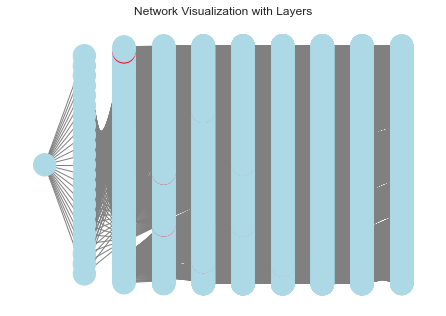

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Dataset
# dataset = {
#     "0000": ["0001", "0010", "0100"],
#     "0001": ["0010", "0100"],
#     "0010": ["0000", "0001", "0100", "1000"],
#     "0011": ["0000", "0100", "1001"],
#     "0100": ["0000", "0001", "0010", "0011"],
#     "0101": ["0010", "0110"],
#     "0110": ["0100", "0101"],
#     "0111": ["0010", "0100", "0101", "1001"],
#     "1000": ["0010", "1010"],
#     "1001": ["0011", "0111", "1101"],
# }
node_relation = G_trajectory_list[0]
layer_info_int = G_layer_info_list[0]

# Create graph
G = nx.Graph()
for node, edges in node_relation.items():
    G.add_node(node)
    for edge in edges:
        G.add_edge(node, edge)

# Create a dictionary to store the node positions for each layer
layer_positions = {layer: [] for layer in range(max(layer_info_int.values()) + 1)}

# Assign node positions within each layer
for node, layer in layer_info_int.items():
    layer_positions[layer].append(node)

# Calculate the x-coordinate for each node within its layer; -> Layer Information
layer_width = 1.0 / (len(layer_positions) + 1)  # Width of each layer column
node_positions = {}
for layer, nodes in layer_positions.items():
    x = (layer + 1) * layer_width  # x-coordinate for the layer
    y_step = 1.0 / (len(nodes) + 1)  # Vertical spacing between nodes in the layer
    for i, node in enumerate(nodes):
        y = (i + 1) * y_step  # y-coordinate for the node
        node_positions[node] = (x, y)

# Identify nodes without outward links
nodes_without_links = [node for node in G.nodes if node_relation[node] == []] # each key have the follow-up nodes

# Set the node positions as node attributes
nx.set_node_attributes(G, node_positions, 'pos')
# Visualize the graph
pos = nx.get_node_attributes(G, 'pos')

# Set the node color for nodes without outward links to red
node_color = ['red' if node in nodes_without_links else 'lightblue' for node in G.nodes]

nx.draw(G, pos, with_labels=False, node_color=node_color, node_size=500, edge_color='gray')

# Draw the node labels
# labels = nx.draw_networkx_labels(G, pos, font_color='black')
#
# # Automatically adjust the positions of the node labels to prevent overlap
# adjust_text(list(labels.values()), autoalign='xy', only_move={'points': 'xy'})

# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title("Network Visualization with Layers")
plt.axis('off')  # Turn off the axis
plt.show()

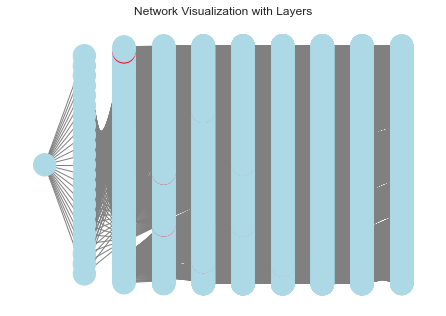

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Dataset
# dataset = {
#     "0000": ["0001", "0010", "0100"],
#     "0001": ["0010", "0100"],
#     "0010": ["0000", "0001", "0100", "1000"],
#     "0011": ["0000", "0100", "1001"],
#     "0100": ["0000", "0001", "0010", "0011"],
#     "0101": ["0010", "0110"],
#     "0110": ["0100", "0101"],
#     "0111": ["0010", "0100", "0101", "1001"],
#     "1000": ["0010", "1010"],
#     "1001": ["0011", "0111", "1101"],
# }
node_relation = G_trajectory_list[0]
layer_info_int = G_layer_info_list[0]

# Create graph
G = nx.Graph()
for node, edges in node_relation.items():
    G.add_node(node)
    for edge in edges:
        G.add_edge(node, edge)

# Create a dictionary to store the node positions for each layer
layer_positions = {layer: [] for layer in range(max(layer_info_int.values()) + 1)}

# Assign node positions within each layer
for node, layer in layer_info_int.items():
    layer_positions[layer].append(node)

# Calculate the x-coordinate for each node within its layer; -> Layer Information
layer_width = 1.0 / (len(layer_positions) + 1)  # Width of each layer column
node_positions = {}
for layer, nodes in layer_positions.items():
    x = (layer + 1) * layer_width  # x-coordinate for the layer
    y_step = 1.0 / (len(nodes) + 1)  # Vertical spacing between nodes in the layer
    for i, node in enumerate(nodes):
        y = (i + 1) * y_step  # y-coordinate for the node
        node_positions[node] = (x, y)

# Identify nodes without outward links
nodes_without_links = [node for node in G.nodes if node_relation[node] == []] # each key have the follow-up nodes

# Set the node positions as node attributes
nx.set_node_attributes(G, node_positions, 'pos')
# Visualize the graph
pos = nx.get_node_attributes(G, 'pos')

# Set the node color for nodes without outward links to red
node_color = ['red' if node in nodes_without_links else 'lightblue' for node in G.nodes]

nx.draw(G, pos, with_labels=False, node_color=node_color, node_size=500, edge_color='gray')

# Draw the node labels
# labels = nx.draw_networkx_labels(G, pos, font_color='black')
#
# # Automatically adjust the positions of the node labels to prevent overlap
# adjust_text(list(labels.values()), autoalign='xy', only_move={'points': 'xy'})

# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title("Network Visualization with Layers")
plt.axis('off')  # Turn off the axis
plt.show()

Graph named 'G0' with 0 nodes and 0 edges
Graph named 'G99' with 221 nodes and 239 edges
44 connected components


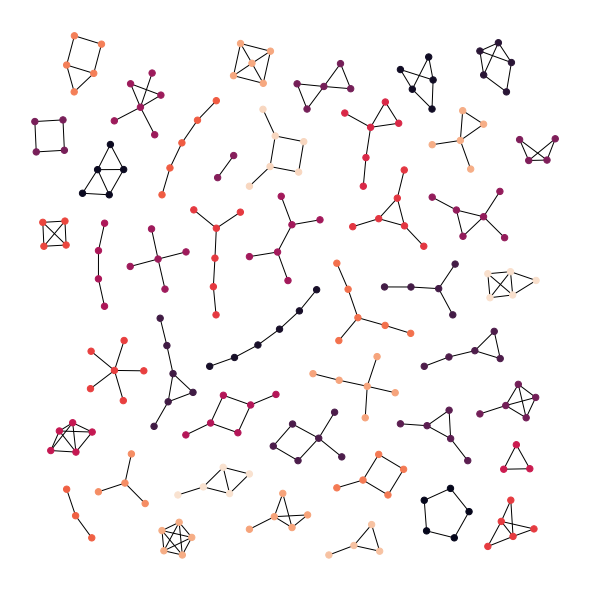